In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/wine-data/wine_data.csv',usecols=[0,1,2],header=None)
df.columns=['Class Label', 'Alcohol','Malic Acid']


In [3]:
df.sample(5)

,Class Label,Alcohol,Malic Acid
86,2,12.16,1.61
4,1,13.24,2.59
103,2,11.82,1.72
76,2,13.03,0.90
62,2,13.67,1.25


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

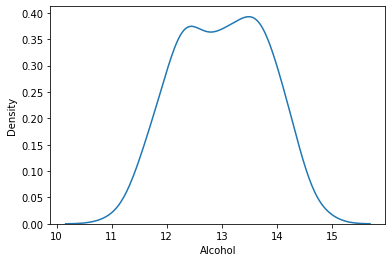

In [4]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

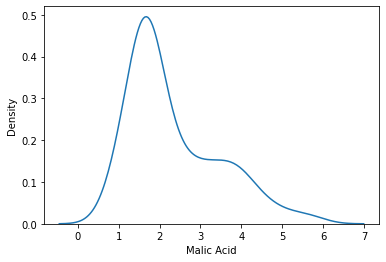

In [5]:
sns.kdeplot(df['Malic Acid'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

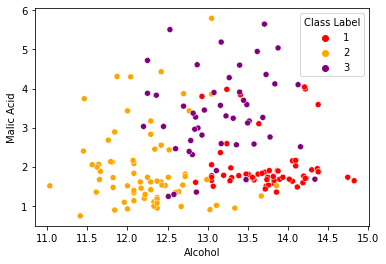

In [6]:
color_dictionary={1:'red',2:'orange',3:'purple'}
sns.scatterplot(df['Alcohol'],df['Malic Acid'],hue=df['Class Label'],palette=color_dictionary)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df.drop('Class Label',axis=1),df['Class Label'],random_state=2,test_size=0.2)

In [8]:
X_train.shape, y_train.shape

((142, 2), (142,))